<a href="https://colab.research.google.com/github/midnightripper/testing/blob/main/FOR_BATCH_OF_SIZE_2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import section
import os
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint ,EarlyStopping
from keras.layers import Dropout
from keras import optimizers
from keras import backend as K
import keras
from sklearn import svm
from tensorflow.keras.models import Sequential

adam = tf.keras.optimizers.Adam(learning_rate=0.0005)

In [ ]:
#loading data 
import numpy as np
import scipy.io
def dataloader(path,featType):#if featType = 1 ==> acoustic, if featType = 2 ==> acoustic+context
  data = scipy.io.loadmat(path)
  print(data.keys())
  if featType == 1:
    AF = data['AF']; x = AF[0:-2]; y = AF[-2]; w = AF[-1];
  else:
    AF = data['AF']; x1 = AF[0:-2]; x2 = data['CF']; y = AF[-2]; w = AF[-1]; 
    x = np.concatenate((x1,x2), axis=0)
  return x.T, y.T, w.T, data['CF_info']

In [ ]:
import tensorflow as tf
!pip install tensorflow-addons
import tensorflow_addons as tfa
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 15.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
def normalization(feats,avg,std):
  ii=0
  for v in feats:
    # print(len(v))
    feats[ii] = np.divide((v-avg),std)
    ii = ii+1
  return feats

# better use np.norm for faster processing

In [ ]:
# post processing the labels
def make_partitions(arr_words, arr_labels):
  v=[]
  np.array(v)
  temp=[]
  for i in range(len(arr_words)-1):
    word=arr_words[i]
    next_word=arr_words[i+1]
    temp.append(arr_labels[i])
    if word!=next_word:
      numpy_temp=np.array(temp)
      temp_max=np.amax(numpy_temp)
      numpy_temp=np.divide(numpy_temp, temp_max)
      v=np.concatenate((v, numpy_temp), axis=None)
      temp.clear()
    if (i==len(arr_words)-2):
      temp.append(arr_labels[i+1])
      numpy_temp=np.array(temp)
      temp_max=np.amax(numpy_temp)
      numpy_temp=np.divide(numpy_temp, temp_max)
      v=np.concatenate((v, numpy_temp), axis=None)
      temp.clear()
  v1=[]
  for i in v:
    if i==1:
      v1.append(1)
    else:
      v1.append(0)
  return v1

In [ ]:
#Function to compute classification accuracy
# similarity measure
def calculate_accuracy(arr1, arr2):
  count=0
  for itr1, itr2 in zip(arr1, arr2):
    if itr1==itr2:
      count+=1
  return count/len(arr1)

In [ ]:
import statistics
import keras.backend as K
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Dropout
from keras.layers import concatenate
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
from sklearn.metrics import f1_score

In [ ]:
fatyp = 'TypicalFA_comb1'
drivepath = '/content/drive/MyDrive/finalData/'+ fatyp +'/';
#featFiles = 'GER_train_fisher-2000_FA_GT_ESTphnTrans_estStress'               #glob.glob(drivepath + '*train*')
filee = drivepath+'GER_train_fisher-2000_FA_GT_ESTphnTrans_estStress.mat'
featType = 1; #Acoustic or Acoustic+context
if featType == 1:
  original_dim = 19
else:
  original_dim = 38

In [ ]:
# print('Classification with::::::',os.path.basename(filee))

train_path = filee; test_path = filee.replace('train','test')
# print('test file:::::::',os.path.basename(test_path))
xtrain, ytrain, wtrain, info_train = dataloader(train_path, featType); 
xtrain1, ytrain1, wtrain1, info_train1 = dataloader(train_path, featType=2);

xtest, ytest, wtest ,info_test = dataloader(test_path, featType)
xtest1, ytest1, wtest1, info_test1 = dataloader(test_path, featType=2);



dict_keys(['__header__', '__version__', '__globals__', 'AF', 'AF_info', 'CF', 'CF_info'])
dict_keys(['__header__', '__version__', '__globals__', 'AF', 'AF_info', 'CF', 'CF_info'])
dict_keys(['__header__', '__version__', '__globals__', 'AF', 'AF_info', 'CF', 'CF_info'])
dict_keys(['__header__', '__version__', '__globals__', 'AF', 'AF_info', 'CF', 'CF_info'])


In [ ]:
train_size = xtrain.shape[0]
print(train_size)
avg_trainfeat=np.mean(xtrain, axis=0)
std_trainfeat=np.std(xtrain, axis=0)

avg_trainfeat1=np.mean(xtrain1, axis=0)
std_trainfeat1=np.std(xtrain1, axis=0)

5891


In [ ]:
xtest_a = normalization(xtest,avg_trainfeat,std_trainfeat)
xtest_ac = normalization(xtest1,avg_trainfeat1,std_trainfeat1)

xtrain = normalization(xtrain,avg_trainfeat,std_trainfeat)
xtrain1 = normalization(xtrain1,avg_trainfeat1,std_trainfeat1)

In [ ]:

print(xtrain.shape)
woPP=[]; wPP=[]

input_shape1 = (19,)
input_shape2 = (38,)

temperature = 0.03
learning_rate=0.001

(5891, 19)


In [ ]:
class SupervisedContrastiveLoss(keras.losses.Loss):
    def __init__(self, temperature=temperature, name=None):
        super(SupervisedContrastiveLoss, self).__init__(name=name)
        self.temperature = temperature

    def __call__(self, labels, feature_vectors, sample_weight=None):
        # Normalize feature vectors
        print(feature_vectors.shape)
        # labels = tf.keras.layers.Concatenate(axis=0)([labels, labels])
        feature_vectors_normalized = tf.math.l2_normalize(feature_vectors, axis=1)

        # Compute logits
        logits = tf.divide(tf.matmul(feature_vectors_normalized, tf.transpose(feature_vectors_normalized)), self.temperature)
        
        # print(feature_vectors.shape)
        # print(labels.shape)
        # print('loss:::::::', tfa.losses.npairs_loss(tf.squeeze(labels), logits))
        return 0.35*(tfa.losses.npairs_loss(tf.squeeze(labels), logits))
        #find out more about why 0.35 is used

In [ ]:
latent_dim = 10

class Encoder1(Model):
  def __init__(self, latent_dim):
    super(Encoder1, self).__init__()
    self.latent_dim = latent_dim 
    inputs = keras.Input(19,)
    outputs = inputs  
    self.encoder = tf.keras.Sequential([
      inputs,
      
      layers.Dense(128, activation='relu'),
      layers.BatchNormalization(),
      layers.Dropout(0.3),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(latent_dim, activation='relu'),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    return encoded

class Encoder2(Model):
  def __init__(self, latent_dim):
    super(Encoder2, self).__init__()
    self.latent_dim = latent_dim
    inputs = keras.Input(38,)
    outputs = inputs  
    self.encoder = tf.keras.Sequential([
      inputs,
      layers.Dense(256, activation='relu'),
      layers.BatchNormalization(),
      layers.Dropout(0.5),
      layers.Dense(128, activation='relu'),
      layers.BatchNormalization(),
      layers.Dropout(0.2),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(latent_dim, activation='relu'),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    return encoded

In [ ]:
def create_encoder1():
    return Encoder1(latent_dim)

def create_encoder2():
    return Encoder2(latent_dim)

def add_projection_head1(Encoder1, Encoder2):
    inp1 = keras.Input(shape=input_shape1)
    inp2 = keras.Input(shape=input_shape2)
    hidden3a  = Encoder1(inp1)
    hidden3b = Encoder2(inp2)
    features = tf.keras.layers.Concatenate(axis=1)([hidden3a, hidden3b])
    features = layers.Dense(16, activation="relu")(features)
    model = keras.Model(
        inputs=[inp1, inp2], outputs=features, name="cifar-encoder_with_projection-head"
    )
    return model

In [ ]:
def create_classifier(encoder, trainable):

    for layer in encoder.layers:
        layer.trainable = trainable

    inputs1 = keras.Input(shape=input_shape1)
    inputs2 = keras.Input(shape=input_shape2)
    features1 = encoder1(inputs1)
    features2 = encoder2(inputs2)
    features = tf.keras.layers.Concatenate(axis=1)([features1, features2])
    # features = layers.Dropout(0.2)(features)
    features = layers.Dense(hidden_units, activation="relu")(features)
    
    features = layers.BatchNormalization()(features)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(32, activation="relu")(features)
    features = layers.Dropout(0.2)(features)
    features = layers.Dense(16, activation="relu")(features)
    # features = layers.BatchNormalization()(features)
    # features = layers.Dropout(0.2)(features)
    features = layers.Dense(4, activation="relu")(features)
    # features = layers.BatchNormalization()(features)
    # features = layers.Dropout(0.1)(features)
    outputs = layers.Dense(num_classes, activation="softmax")(features)

    model = keras.Model(inputs=[inputs1,inputs2], outputs=outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )
    return model

#single iteration

In [ ]:
# j = 0  # Single iteration

# xval_a = xtrain[(train_size*j)//5:(train_size*(j+1))//5]
# print(xval_a.shape)
# yval_a = ytrain[(train_size*j)//5:(train_size*(j+1))//5]
# xtra_a = np.concatenate((xtrain[:(train_size*j)//5], xtrain[((train_size*(j+1))//5):]), axis=0)
# ytra_a = np.concatenate((ytrain[:(train_size*j)//5], ytrain[((train_size*(j+1))//5):]), axis=0)

# xval_ac = xtrain1[(train_size*j)//5:(train_size*(j+1))//5]
# print(xval_ac.shape)
# yval_ac = ytrain1[(train_size*j)//5:(train_size*(j+1))//5]
# xtra_ac = np.concatenate((xtrain1[:(train_size*j)//5], xtrain1[((train_size*(j+1))//5):]), axis=0)
# ytra_ac = np.concatenate((ytrain1[:(train_size*j)//5], ytrain1[((train_size*(j+1))//5):]), axis=0)

# y = np.concatenate((ytra_a, ytra_a), axis=0)
# yv = np.concatenate((yval_a, yval_a), axis=0)

from sklearn.model_selection import train_test_split

# Splitting xtrain and ytrain into training and validation sets
xtra_a, xval_a, ytra_a, yval_a = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)

# Splitting xtrain1 and ytrain1 into training and validation sets
xtra_ac, xval_ac, ytra_ac, yval_ac = train_test_split(xtrain1, ytrain1, test_size=0.2, random_state=42)

encoder1 = create_encoder1()
encoder2 = create_encoder2()
encoder_with_projection_head = add_projection_head1(encoder1, encoder2)
encoder_with_projection_head.compile(optimizer=keras.optimizers.Adam(learning_rate), loss=SupervisedContrastiveLoss(temperature))
encoder_with_projection_head.summary()

history = encoder_with_projection_head.fit([xtra_a, xtra_ac], ytra_a, validation_data=([xval_a, xval_ac], yval_a), batch_size=32, epochs=100, callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtrain1.shape)
print(ytrain1.shape)

(5891, 19)
(5891,)
(5891, 38)
(5891,)


In [ ]:
learning_rate = 0.0005
batch_size = 16
hidden_units = 64
projection_units = 128
num_epochs = 200
dropout_rate = 0.3
num_classes = 2
input_shape1 = (19,)
input_shape2 = (38,)

from keras.callbacks import ModelCheckpoint, EarlyStopping
classifier = create_classifier(encoder_with_projection_head, trainable=False)
classifier.summary()

history = classifier.fit(x=[xtra_a, xtra_ac], y=ytra_a, validation_data=([xval_a, xval_ac], yval_a), batch_size=batch_size, epochs=num_epochs, callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 19)]         0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 38)]         0           []                               
                                                                                                  
 encoder1 (Encoder1)            (None, 10)           13738       ['input_5[0][0]']                
                                                                                                  
 encoder2 (Encoder2)            (None, 10)           55082       ['input_6[0][0]']                
                                                                                              

In [ ]:
accuracy = classifier.evaluate([xtest_a, xtest_ac], ytest)[1]
print(accuracy)
##  Accuracy on post processed labels (each word should contain only one stressed syllable)
pred_output= classifier.predict([xtest_a,xtest_ac])
# pred_labels= pred_output.argmax(axis =1)
pred1_labels = pred_output[:,1]
post_labels = make_partitions(wtest, pred1_labels)
post_accuracy = calculate_accuracy(post_labels, ytest)

F1_score_WoPP = f1_score(ytest, pred_output.argmax(axis=1))
F1_score_WPP = f1_score(ytest, post_labels)

print(f"Test accuracy: {round(accuracy * 100, 3)}%")
print(f"Postprocessing Test accuracy: {round(post_accuracy * 100, 3)}%")
print(f"Test F1_score: {round(F1_score_WoPP * 100, 3)}%")
print(f"Postprocessing F1_score: {round(F1_score_WPP * 100, 3)}%")

150/150 [==============================] - 0s 2ms/step - loss: 0.2614 - sparse_categorical_accuracy: 0.8985
0.8985174298286438
150/150 [==============================] - 1s 2ms/step
Test accuracy: 89.852%
Postprocessing Test accuracy: 92.775%
Test F1_score: 88.412%
Postprocessing F1_score: 91.781%


In [ ]:
print(pred_output)

[[0.01527948 0.9847205 ]
 [0.91811997 0.08188005]
 [0.9850363  0.01496362]
 ...
 [0.05571439 0.9442856 ]
 [0.97278744 0.02721256]
 [0.99338067 0.00661939]]


In [ ]:
inaccurate_indices = []
for i in range(len(post_labels)):
    if post_labels[i] != ytest[i]:
        inaccurate_indices.append(i)
print(len(inaccurate_indices))

346


In [ ]:
new_array = xtest_a[inaccurate_indices]

In [ ]:
print(new_array)

[[-0.40149369 -0.62114645 -0.34175573 ...  0.46399327 -1.42482567
  -1.32608787]
 [-0.05920806 -0.16476418 -0.11985682 ...  2.34911447  2.04098575
   1.9812135 ]
 [ 1.02742843  0.70967314  1.10380372 ... -0.91318679 -0.99562302
  -0.90747504]
 ...
 [-0.328765   -0.37839626 -0.71037262 ... -0.91981712  1.12893011
   1.15774923]
 [-0.21204723 -0.0996436  -0.31811955 ... -0.29083692  0.30808004
  -0.013952  ]
 [-0.21912786  0.54959175  0.01706703 ...  0.7673992   0.30808004
   0.66907763]]


In [ ]:
fatyp = 'TypicalFA_comb1'
drivepath = '/content/drive/MyDrive/finalData/'+ fatyp +'/';
#featFiles = 'GER_train_fisher-2000_FA_GT_ESTphnTrans_estStress'               #glob.glob(drivepath + '*train*')
filee = drivepath+'GER_train_fisher-2000_FA_GT_ESTphnTrans_estStress.mat'
train_path = filee; test_path = filee.replace('train','test')
data = scipy.io.loadmat(train_path)
print(data.keys())
AF = data['AF']
print(AF.shape)

dict_keys(['__header__', '__version__', '__globals__', 'AF', 'AF_info', 'CF', 'CF_info'])
(21, 5891)


In [ ]:
second_to_last_row = AF[-2, :]

# Count the number of zeros in the second-to-last row
zeros_count = np.count_nonzero(second_to_last_row == 0)

# Print the count
print("Number of zeros in the second-to-last row:", zeros_count)

# Count the number of zeros in the second-to-last row
ones_count = np.count_nonzero(second_to_last_row == 1)

# Print the count
print("Number of ones in the second-to-last row:", ones_count)


Number of zeros in the second-to-last row: 3313
Number of ones in the second-to-last row: 2578


In [ ]:
# scipy.io.savemat('check.mat', {'matrix_name':saving})

In [ ]:
u, count = np.unique(AF[-1], return_counts=True)
a = u[np.logical_or(count < 2, count > 2)]
b = AF[:, np.isin(AF[-1], a, invert=True)]
print(b.shape)

(21, 3964)


In [ ]:
x_train = b[0:-2]; y_train = b[-2]; w_1 = b[-1];
print(x_train.shape)
print(y_train.shape)
print(w_1.shape)

(19, 3964)
(3964,)
(3964,)


In [ ]:
print(AF.shape)

(21, 5891)


In [ ]:
modified_rows1 = AF[:-2]
last_rows1 = AF[-2:]
CF = data['CF']
concatenated_array = np.concatenate((modified_rows1, CF,last_rows1), axis=0)
new=concatenated_array
u, count = np.unique(new[-1], return_counts=True)
a = u[np.logical_or(count < 2, count > 2)]
c = new[:, np.isin(new[-1], a, invert=True)]
print(c.shape)

(40, 3964)


In [ ]:
x_train1 = c[0:-2]; y_train1 = c[-2]; w_2 = c[-1];
print(x_train1.shape)
print(y_train1.shape)
print(w_2.shape)

(38, 3964)
(3964,)
(3964,)


In [ ]:
import random
pairs=[]

In [ ]:
for i in range(0, 3964, 2):
    pairs.append(random.randint(0, 1))
    if(pairs[i]==0):
      pairs.append(1)
    else:
      pairs.append(0)

In [ ]:
print(pairs)
print(len(pairs))

[1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 

In [ ]:
y_new=pairs

In [ ]:
print(x_train.shape)
print(len(y_new))
y_new = np.array(y_new, dtype='float32')

(3964, 19)
3964


In [ ]:
print(y_new.shape)
x_train = x_train.transpose()
print(y_new.shape)


(3964,)
(3964,)


In [ ]:
print(x_train.shape)

(3964, 19)


In [ ]:
x_train1=xtrain1.transpose()

In [ ]:
pairs1=[]
for i in range(0, 1927, 2):
    pairs1.append(random.randint(0, 1))
    if(i==1927):
      pairs1.append(1)
      break
    elif(pairs1[i]==0):
      pairs1.append(1)
    else:
      pairs1.append(0)

In [ ]:
pairs1.pop()

0

In [ ]:
print(len(pairs1))
print(len(pairs))

1927
3964


In [ ]:
pairs2=pairs+pairs1

In [ ]:
print(len(pairs2))

5891


In [ ]:
print(x_train1.shape)

(38, 5891)


In [ ]:
y_new1 = np.array(pairs2, dtype='float32')

In [ ]:
x_train1=x_train1.transpose()

In [ ]:
print(y_new1.shape)
print(xtrain.shape)
print(y_new1.shape)
print(xtrain1.shape)

(5891,)
(5891, 19)
(5891,)
(5891, 38)


In [ ]:
print(type(y_new1))
print(type(x_train1))
print(type(y_new))
print(type(x_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Splitting xtrain and ytrain into training and validation sets
xtra_a, xval_a, ytra_a, yval_a = train_test_split(xtrain, y_new1, test_size=0.2, random_state=42)

# Splitting xtrain1 and ytrain1 into training and validation sets
xtra_ac, xval_ac, ytra_ac, yval_ac = train_test_split(x_train1, y_new1, test_size=0.2, random_state=42)

In [ ]:
print("Shape of xtra_a:", xtra_a.shape)
print("Shape of xval_a:", xval_a.shape)
print("Shape of ytra_a:", ytra_a.shape)
print("Shape of yval_a:", yval_a.shape)
print("Shape of xtra_ac:", xtra_ac.shape)
print("Shape of xval_ac:", xval_ac.shape)
print("Shape of ytra_ac:", ytra_ac.shape)
print("Shape of yval_ac:", yval_ac.shape)

Shape of xtra_a: (4712, 19)
Shape of xval_a: (1179, 19)
Shape of ytra_a: (4712,)
Shape of yval_a: (1179,)
Shape of xtra_ac: (4712, 38)
Shape of xval_ac: (1179, 38)
Shape of ytra_ac: (4712,)
Shape of yval_ac: (1179,)


In [ ]:
print("Shape of xtra_a:", xtra_a.shape)
print("Shape of xval_a:", xval_a.shape)
print("Shape of ytra_a:", ytra_a.shape)
print("Shape of yval_a:", yval_a.shape)
print("Shape of xtra_ac:", xtra_ac.shape)
print("Shape of xval_ac:", xval_ac.shape)
print("Shape of ytra_ac:", ytra_ac.shape)
print("Shape of yval_ac:", yval_ac.shape)

Shape of xtra_a: (4712, 19)
Shape of xval_a: (1179, 19)
Shape of ytra_a: (4712,)
Shape of yval_a: (1179,)
Shape of xtra_ac: (4712, 38)
Shape of xval_ac: (1179, 38)
Shape of ytra_ac: (4712,)
Shape of yval_ac: (1179,)


In [ ]:
encoder1 = create_encoder1()
encoder2 = create_encoder2()
encoder_with_projection_head = add_projection_head1(encoder1, encoder2)
encoder_with_projection_head.compile(optimizer=keras.optimizers.Adam(learning_rate), loss=SupervisedContrastiveLoss(temperature))
encoder_with_projection_head.summary()
batch_size = 4

history = encoder_with_projection_head.fit([xtra_a, xtra_ac], ytra_a, validation_data=([xval_a, xval_ac], yval_a), batch_size=batch_size, epochs=100, callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])
learning_rate = 0.0005

hidden_units = 64
projection_units = 128
num_epochs = 200
dropout_rate = 0.3
num_classes = 2
input_shape1 = (19,)
input_shape2 = (38,)

from keras.callbacks import ModelCheckpoint, EarlyStopping
classifier = create_classifier(encoder_with_projection_head, trainable=False)
classifier.summary()

history = classifier.fit(x=[xtra_a, xtra_ac], y=ytra_a, validation_data=([xval_a, xval_ac], yval_a), batch_size=batch_size, epochs=num_epochs, callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])

accuracy = classifier.evaluate([xtest_a, xtest_ac], ytest)[1]
print(accuracy)
##  Accuracy on post processed labels (each word should contain only one stressed syllable)
pred_output= classifier.predict([xtest_a,xtest_ac])
# pred_labels= pred_output.argmax(axis =1)
pred1_labels = pred_output[:,1]
post_labels = make_partitions(wtest, pred1_labels)
post_accuracy = calculate_accuracy(post_labels, ytest)

F1_score_WoPP = f1_score(ytest, pred_output.argmax(axis=1))
F1_score_WPP = f1_score(ytest, post_labels)

print(f"Test accuracy: {round(accuracy * 100, 3)}%")
print(f"Postprocessing Test accuracy: {round(post_accuracy * 100, 3)}%")
print(f"Test F1_score: {round(F1_score_WoPP * 100, 3)}%")
print(f"Postprocessing F1_score: {round(F1_score_WPP * 100, 3)}%")


Model: "cifar-encoder_with_projection-head"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_43 (InputLayer)          [(None, 19)]         0           []                               
                                                                                                  
 input_44 (InputLayer)          [(None, 38)]         0           []                               
                                                                                                  
 encoder1_9 (Encoder1)          (None, 10)           13738       ['input_43[0][0]']               
                                                                                                  
 encoder2_9 (Encoder2)          (None, 10)           55082       ['input_44[0][0]']               
                                                                 

In [ ]:
encoder1 = create_encoder1()
encoder2 = create_encoder2()
encoder_with_projection_head = add_projection_head1(encoder1, encoder2)
encoder_with_projection_head.compile(optimizer=keras.optimizers.Adam(learning_rate), loss=SupervisedContrastiveLoss(temperature))
encoder_with_projection_head.summary()
batch_size = 2

history = encoder_with_projection_head.fit([xtra_a, xtra_ac], ytra_a, validation_data=([xval_a, xval_ac], yval_a), batch_size=batch_size, epochs=100, callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])
learning_rate = 0.0005

hidden_units = 64
projection_units = 128
num_epochs = 200
dropout_rate = 0.3
num_classes = 2
input_shape1 = (19,)
input_shape2 = (38,)

from keras.callbacks import ModelCheckpoint, EarlyStopping
classifier = create_classifier(encoder_with_projection_head, trainable=False)
classifier.summary()

history = classifier.fit(x=[xtra_a, xtra_ac], y=ytra_a, validation_data=([xval_a, xval_ac], yval_a), batch_size=batch_size, epochs=num_epochs, callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])

accuracy = classifier.evaluate([xtest_a, xtest_ac], ytest)[1]
print(accuracy)
##  Accuracy on post processed labels (each word should contain only one stressed syllable)
pred_output= classifier.predict([xtest_a,xtest_ac])
# pred_labels= pred_output.argmax(axis =1)
pred1_labels = pred_output[:,1]
post_labels = make_partitions(wtest, pred1_labels)
post_accuracy = calculate_accuracy(post_labels, ytest)

F1_score_WoPP = f1_score(ytest, pred_output.argmax(axis=1))
F1_score_WPP = f1_score(ytest, post_labels)

print(f"Test accuracy: {round(accuracy * 100, 3)}%")
print(f"Postprocessing Test accuracy: {round(post_accuracy * 100, 3)}%")
print(f"Test F1_score: {round(F1_score_WoPP * 100, 3)}%")
print(f"Postprocessing F1_score: {round(F1_score_WPP * 100, 3)}%")


Model: "cifar-encoder_with_projection-head"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_49 (InputLayer)          [(None, 19)]         0           []                               
                                                                                                  
 input_50 (InputLayer)          [(None, 38)]         0           []                               
                                                                                                  
 encoder1_10 (Encoder1)         (None, 10)           13738       ['input_49[0][0]']               
                                                                                                  
 encoder2_10 (Encoder2)         (None, 10)           55082       ['input_50[0][0]']               
                                                                 

InvalidArgumentError: ignored

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

185/185 [==============================] - 1s 4ms/step
(5891, 10)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5891 samples in 0.028s...
[t-SNE] Computed neighbors for 5891 samples in 0.752s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5891
[t-SNE] Computed conditional probabilities for sample 2000 / 5891
[t-SNE] Computed conditional probabilities for sample 3000 / 5891
[t-SNE] Computed conditional probabilities for sample 4000 / 5891
[t-SNE] Computed conditional probabilities for sample 5000 / 5891
[t-SNE] Computed conditional probabilities for sample 5891 / 5891
[t-SNE] Mean sigma: 1.622783
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.647438
[t-SNE] KL divergence after 1000 iterations: 0.937906


<ipython-input-158-179baf66a2e8>:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),


[Text(0.5, 1.0, 'MNIST data T-SNE projection')]

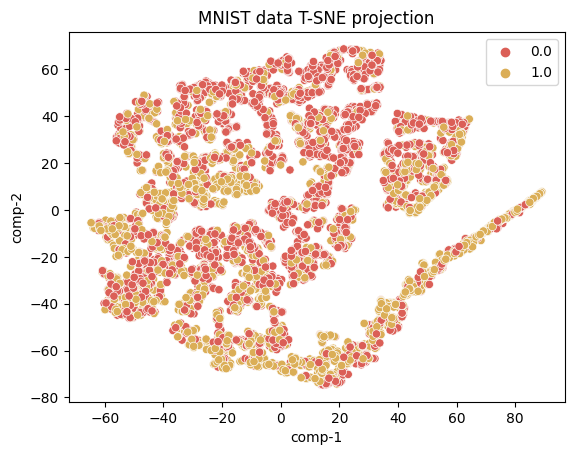

In [ ]:
encoded_data = encoder1.predict(xtrain)
print(encoded_data.shape)
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(encoded_data)
df = pd.DataFrame()
df["y"] = ytrain
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data T-SNE projection")

185/185 [==============================] - 1s 2ms/step
(5891, 10)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5891 samples in 0.012s...
[t-SNE] Computed neighbors for 5891 samples in 0.301s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5891
[t-SNE] Computed conditional probabilities for sample 2000 / 5891
[t-SNE] Computed conditional probabilities for sample 3000 / 5891
[t-SNE] Computed conditional probabilities for sample 4000 / 5891
[t-SNE] Computed conditional probabilities for sample 5000 / 5891
[t-SNE] Computed conditional probabilities for sample 5891 / 5891
[t-SNE] Mean sigma: 1.643234
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.846893
[t-SNE] KL divergence after 1000 iterations: 0.841848


<ipython-input-160-ffe584ebf13f>:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),


[Text(0.5, 1.0, 'T-SNE projection')]

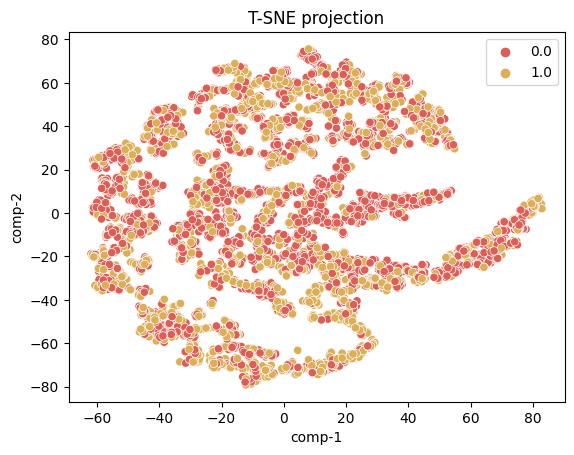

In [ ]:
encoded_data = encoder2.predict(x_train1)
print(encoded_data.shape)
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(encoded_data)
df = pd.DataFrame()
df["y"] = ytrain1
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="T-SNE projection")

185/185 [==============================] - 1s 3ms/step
(5891, 16)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5891 samples in 0.001s...
[t-SNE] Computed neighbors for 5891 samples in 0.421s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5891
[t-SNE] Computed conditional probabilities for sample 2000 / 5891
[t-SNE] Computed conditional probabilities for sample 3000 / 5891
[t-SNE] Computed conditional probabilities for sample 4000 / 5891
[t-SNE] Computed conditional probabilities for sample 5000 / 5891
[t-SNE] Computed conditional probabilities for sample 5891 / 5891
[t-SNE] Mean sigma: 3.748492
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.797562
[t-SNE] KL divergence after 1000 iterations: 1.254517


<ipython-input-161-b278de4e35d5>:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),


[Text(0.5, 1.0, 'MNIST data T-SNE projection')]

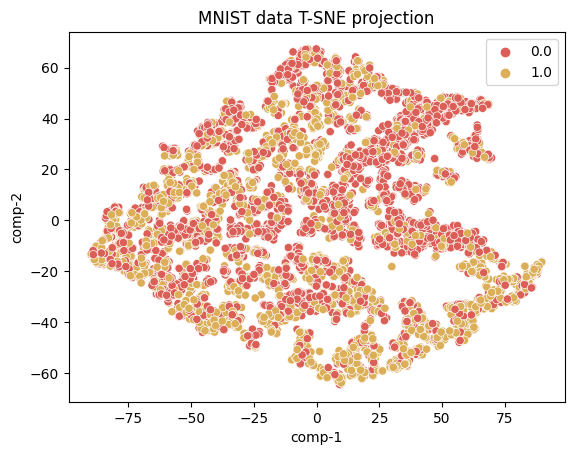

In [ ]:
encoded_data = encoder_with_projection_head.predict([xtrain, xtrain1])
print(encoded_data.shape)
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(encoded_data)
df = pd.DataFrame()
df["y"] = ytrain
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data T-SNE projection")

Implementation of a new encoder from scratch to test it's embedding due to supervised contrastive learning 

In [2]:
def create_encoder(start,latent_dim):
    layers.Dense(start, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(start//2, activation='relu'),
    layers.Dense(start//4, activation='relu'),
    layers.Dense(latent_dim, activation='relu'),
    resnet=Sequential([layer1,layer2,layer3,layer4])
    inputs = keras.Input(shape=input_shape)
    outputs = resnet(inputs)
    outputs = keras.Input(shape=input_shape)
    model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10-encoder")
    return model


In [3]:
def encoder(starting_units, ending_units,input_shape):
    model = Sequential()
    model.add(Dense(starting_units, activation='relu', input_shape=(input_shape))) 
    model.add(Dense(starting_units//2, activation='relu'))
    model.add(Dense(starting_units//4, activation='relu'))
    model.add(Dense(starting_units//8, activation='relu'))
    model.add(Dense(ending_units, activation='softmax'))  # Assuming ending_units is the number of output classes
    return model

In [4]:
encoder1=encoder(128,16,input_shape1)

NameError: ignored

In [ ]:
encoder1.summary